In [4]:
import pandas as pd

train = pd.read_csv('../data/questions/Questions54_filter_tags.csv')


In [5]:
tags = pd.read_csv('../data/tags/20211110/ts1000/_2_1_commonTags.csv')
tag_count = pd.read_csv('../data/tags/20211110/Tags54_TagCount_Sorted.csv')
tag_count_1000 = tag_count[tag_count['count'] > 1000]


In [3]:
print(train.shape[0])
train.head()

404038


,Unnamed: 0,qid,title,desc_text,desc_code,creation_date,clean_tags
0,0,67881561,Why is my code returning the answer a million ...,I have a few different functions im figuring o...,import csv def coldest_temperature(input_file)...,2021-06-08T04:48:23.780,"['python-3.x', 'csv']"
1,1,67881547,Formating a sum reduce function in Python,I'm trying to format the result of a sum funct...,from functools import reduce def sum_equation(...,2021-06-08T04:46:55.547,['python']
2,2,67881569,"Functionallity (supposedly) of shutil.which(""f...",I have a github project for my app Scout. I us...,NaN,2021-06-08T04:49:10.447,['python']
3,3,67881560,How to create a Telegram Bot Inline Keyboard M...,I have created a Python Telegram Bot with an I...,NaN,2021-06-08T04:48:19.650,['python']
4,4,67881549,app.use() and router.post() is not working,My app.use() is not working.It shows 'Cannot P...,**app.js** const express=require('express'); c...,2021-06-08T04:47:13.633,['node.js']


In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

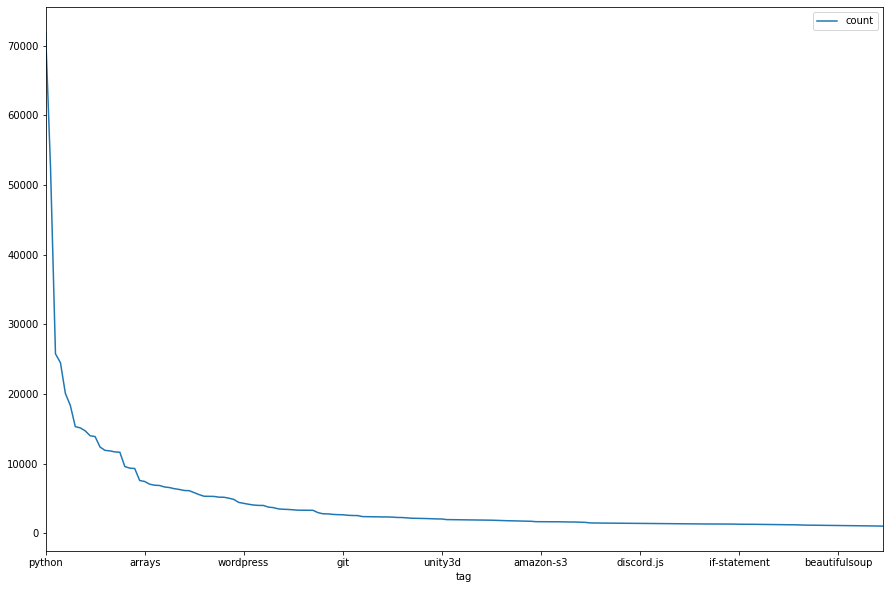

In [6]:
tag_count_1000.plot(x='tag',y="count",figsize=(15,10))

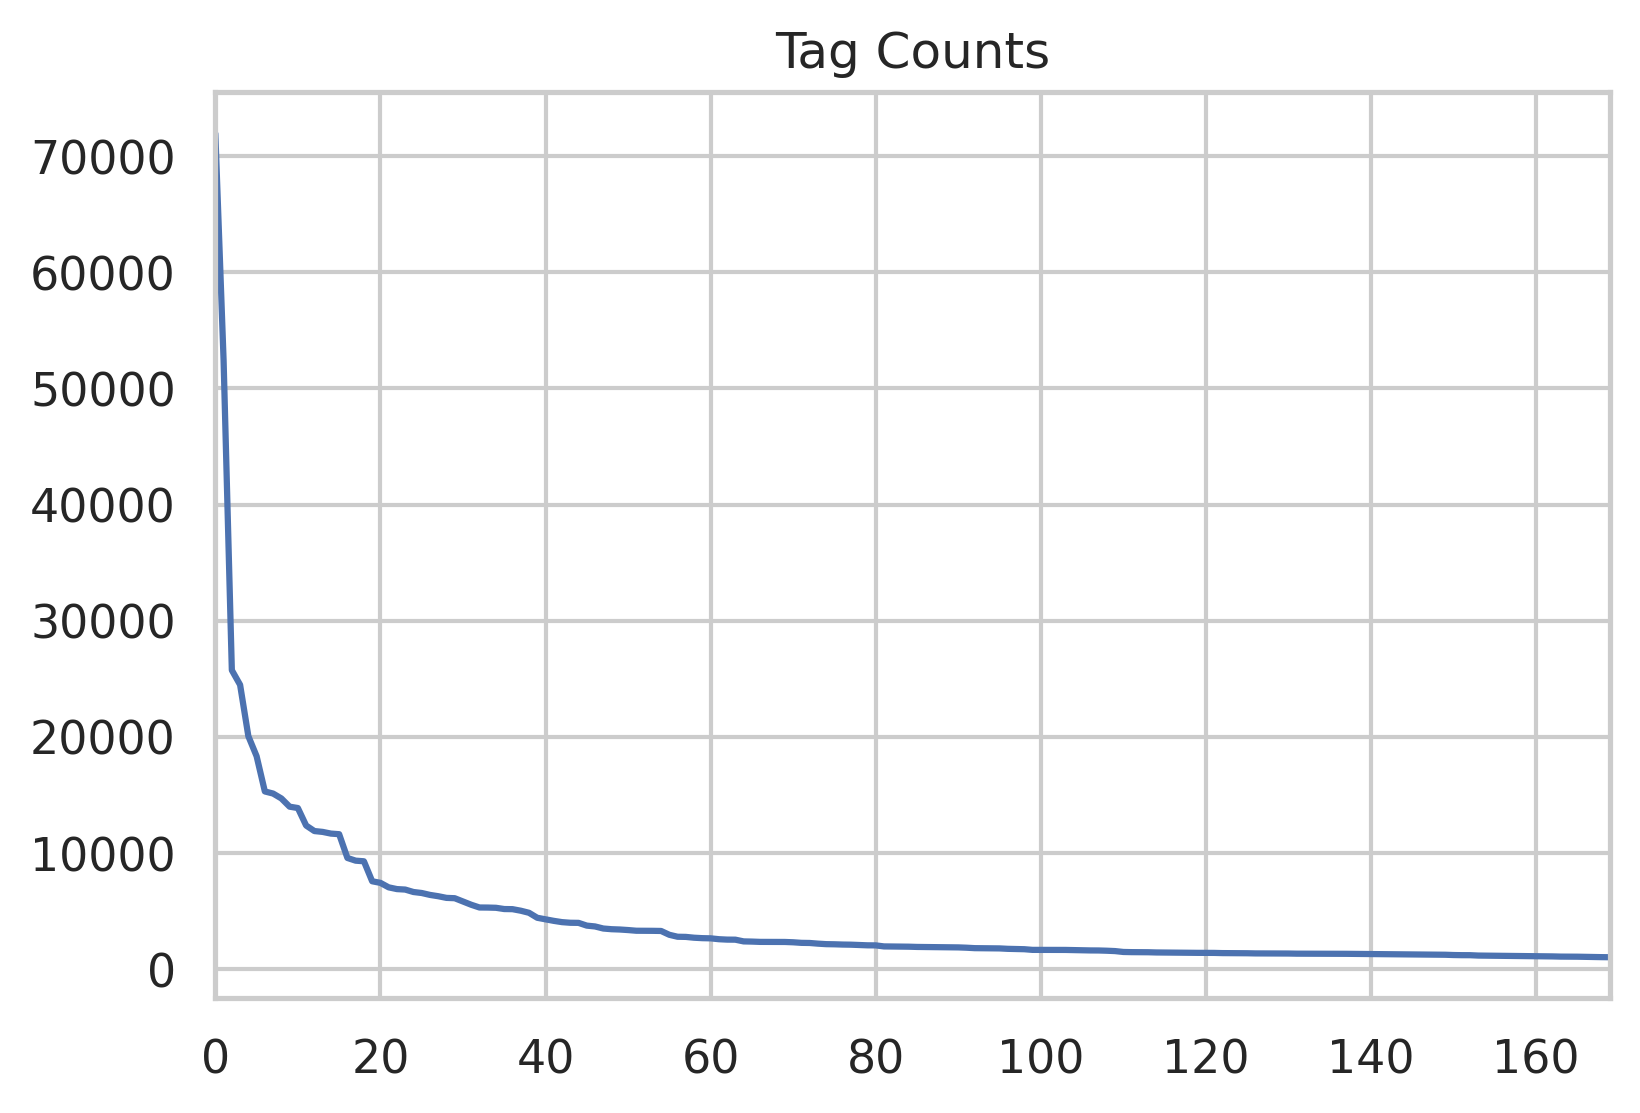

In [17]:
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300


tag_count_1000["count"].plot()
plt.title("Tag Counts");

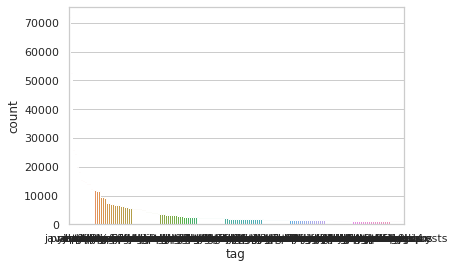

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="tag", y="count", data=tag_count_1000)


In [43]:
# count the number of nan 

print((train['clean_tags'].isna()).sum())


0


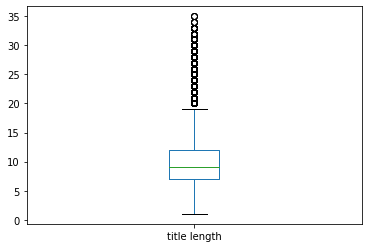

In [27]:
import matplotlib.pyplot as plt

train['title length'] = train["title"].str.split().apply(len)
train.boxplot("title length", grid=False )
plt.suptitle("")
plt.xlabel("");

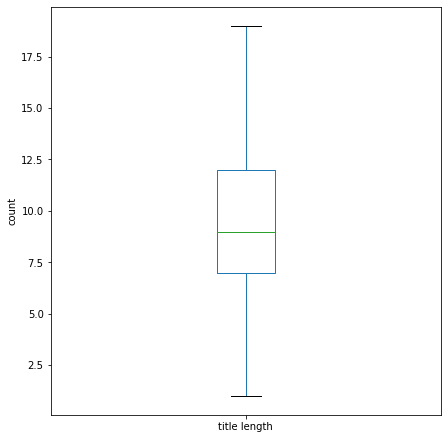

In [67]:
train.boxplot("title length", grid=False,figsize=(7,7.5),showfliers=False,)
plt.suptitle("")
plt.ylabel("count");

In [44]:
train = train.fillna("")

In [36]:
train_na = train[train['desc_text'].notna()]

train_na.shape[0]

403340

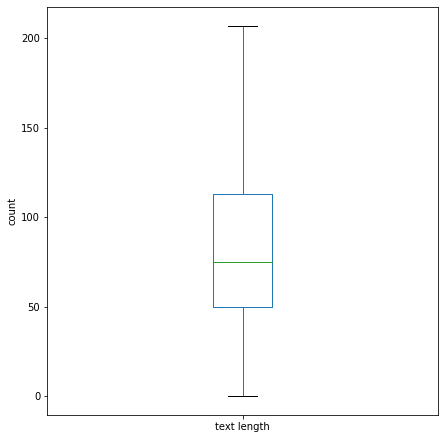

In [66]:
train['text length'] = train["desc_text"].str.split().apply(len)
train.boxplot("text length", grid=False,figsize=(7,7.5),showfliers=False, )
plt.suptitle("")
plt.ylabel("count");

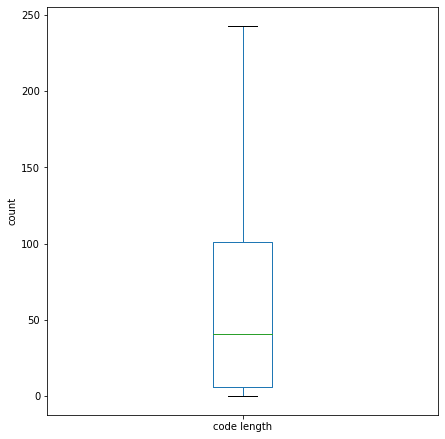

In [65]:
train['code length'] = train["desc_code"].str.split().apply(len)
train.boxplot("code length", grid=False,figsize=(7,7.5),showfliers=False,)
plt.suptitle("")
plt.ylabel("count");

In [64]:
# count outliers
Q1 = train[["title length", "text length","code length"]].quantile(0.25)
Q3 = train[["title length", "text length","code length"]].quantile(0.75)
IQR = Q3 - Q1
print(Q3 + 1.5 * IQR)
# ((train[["title length", "text length","code length"]] > (Q3 + 1.5 * IQR))).sum()


title length     19.5
text length     207.5
code length     243.5
dtype: float64


In [62]:
QMAX = train[["title length", "text length","code length"]].quantile(0.25
                                                                     
                                                                     )
print(QMAX)

title length     7.0
text length     50.0
code length      6.0
Name: 0.25, dtype: float64
